### Imports and checking out columns

Let's start by doing some exploratory data analysis.

We need to import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Now let us check out what the csv file for 2024 looks like.

In [2]:
matches_data = pd.read_csv('../data/raw/atp_matches_2024.csv')
matches_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2024-0339,Brisbane,Hard,32,A,20240101,300,105777,2.0,NaN,...,58.0,44.0,16.0,11.0,8.0,9.0,14.0,2570.0,8.0,3660.0
1,2024-0339,Brisbane,Hard,32,A,20240101,299,208029,1.0,NaN,...,35.0,31.0,10.0,11.0,5.0,7.0,8.0,3660.0,39.0,1122.0
2,2024-0339,Brisbane,Hard,32,A,20240101,298,105777,2.0,NaN,...,39.0,24.0,14.0,10.0,5.0,7.0,14.0,2570.0,55.0,902.0
3,2024-0339,Brisbane,Hard,32,A,20240101,297,208029,1.0,NaN,...,51.0,31.0,16.0,10.0,3.0,5.0,8.0,3660.0,116.0,573.0
4,2024-0339,Brisbane,Hard,32,A,20240101,296,126128,NaN,NaN,...,37.0,27.0,16.0,10.0,5.0,8.0,39.0,1122.0,44.0,1021.0


Interesting. I want to get a better idea of all the columns that are available, to see how we can play around with them and get interesting insights.

In [3]:
matches_data.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

First we construct a dataframe that consolidates all the CSV data from 1985 to 2024.

In [4]:
all_data = pd.read_csv('../data/raw/atp_matches_1985.csv')
all_data['tourney_year'] = 1985

for year in range(1986, 2025):
    new_data = pd.read_csv(f'../data/raw/atp_matches_{year}.csv')
    new_data['tourney_year'] = year
    all_data = pd.concat([all_data, new_data], ignore_index=True)

all_data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_year
0,1985-301,Auckland,Hard,32,A,19850107,1,100713,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29.0,NaN,195.0,NaN,1985
1,1985-301,Auckland,Hard,32,A,19850107,2,100179,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,180.0,NaN,164.0,NaN,1985
2,1985-301,Auckland,Hard,32,A,19850107,3,100798,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,170.0,NaN,239.0,NaN,1985
3,1985-301,Auckland,Hard,32,A,19850107,4,100551,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80.0,NaN,385.0,NaN,1985
4,1985-301,Auckland,Hard,32,A,19850107,5,100618,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,61.0,NaN,517.0,NaN,1985


Some of these column names may not be immediately clear to you. Jeff Sackman has included a matches_data_dictionary.txt file with definitions for each column. Link: https://github.com/JeffSackmann/tennis_atp

### Which GOAT has the highest aces to double faults ratio?

After going through Jeff's dictionary, I noticed that w_ace tells us how many aces the match winner had and l_ace tells us how many aces the match loser had. Under the guise of exploratory data analyses, I'm going to try to figure out which of Djokovic, Nadal, Federer, and Murray has the best aces to double faults ratio. If I had to guess how the GOATs are going to rank against each other:

1. Roger Federer: Undoubtedly the best serve out of all the GOATS. Great placement, so powerful and almost impossible to read from his ball toss.

2. Novak Djokovic: His serve has been pretty effective, especially after he made changes to his technique in 2017. Of course, not nearly as effective as Roger's.

3. Andy Murray: Not a GOAT but included for completeness. Andy is most likely higher than Rafa on this list. Very, very consistent. Almost too consistent and slighly passive.

4. Rafael Nadal: His serve is bjectively the weakest aspect of his game. It makes sense that he ruled on clay courts considering that strong serves is much less consequential on clay than any other surface.

First we filter through the consolidated data frame to select only those matches in which Federer, Djokovic, Nadal or Murray played, which means that one of them must appear in the winner_name or  loser_name or both.

In [5]:
goats = ['Novak Djokovic', 'Rafael Nadal', 'Roger Federer', 'Andy Murray']
goat_matches = all_data[all_data['winner_name'].isin(goats) | all_data['loser_name'].isin(goats)]

goat_matches[['winner_name', 'loser_name']].head()

,winner_name,loser_name
49758,Lucas Arnold Ker,Roger Federer
50814,Roger Federer,Guillaume Raoux
50823,Roger Federer,Richard Fromberg
50828,Jan Siemerink,Roger Federer
50836,Andre Agassi,Roger Federer


Looking good. The only columns that matter now are w_ace, l_ace, w_df and l_df. Let's reduce our dataframe so that only those columns that matter to us are included.

In [6]:
goat_matches = goat_matches[['winner_name', 'loser_name', 'w_ace', 'l_ace', 'w_df', 'l_df']]
goat_matches.tail()

,winner_name,loser_name,w_ace,l_ace,w_df,l_df
128934,Novak Djokovic,Roman Safiullin,4.0,2.0,1.0,2.0
128948,Novak Djokovic,Flavio Cobolli,3.0,3.0,2.0,1.0
128976,Novak Djokovic,Alex Michelsen,7.0,10.0,3.0,0.0
129357,Botic Van De Zandschulp,Rafael Nadal,8.0,2.0,9.0,3.0
129427,Novak Djokovic,Ioannis Xilas,NaN,NaN,NaN,NaN


I'm noticing there are some cells with NaN values, which means that we don't have the data from those matches. Lets replace them with 0s.

In [7]:
cols = ['w_ace', 'l_ace', 'w_df', 'l_df']
goat_matches[cols] = goat_matches[cols].fillna(0)

Time for the reveal! Let's itrate through each row. If the winner (loser) was one of the goats, we add the winner's (loser's) number of aces and double faults to his running count. In the end, we simply divide each player's ace count by his double fault count to get the ratio.

In [8]:
from collections import defaultdict

goat_stats = defaultdict(lambda: {'aces': 0, 'double_faults': 0})
goat_set = set(goats)

for row in goat_matches.itertuples():
    if row.winner_name in goat_set:
        goat_stats[row.winner_name]['aces'] += row.w_ace
        goat_stats[row.winner_name]['double_faults'] += row.w_df
    if row.loser_name in goat_set:
        goat_stats[row.loser_name]['aces'] += row.l_ace
        goat_stats[row.loser_name]['double_faults'] += row.l_df

goat_stats = pd.DataFrame.from_dict(goat_stats, orient='index')
goat_stats['ratio'] = goat_stats['aces'] / goat_stats['double_faults']
goat_stats['ratio'].sort_values(ascending=False)

Roger Federer     4.169405
Andy Murray       2.679253
Novak Djokovic    2.449487
Rafael Nadal      1.853547
Name: ratio, dtype: float64

So the verdict is that Roger is indeed the best server out of all them, Rafa is the worst, and Murray is actually a better server than Djokovic. That is, of course, if we are judging their serves based solely on the number of aces and double faults they made. In reality, many other factors need to be taken into account, such as the percentage of points they won after making their first serve. But Roger is definitely the best server, I just know it.

### Are left-handed players better than right-handed players?

Another statistic I am really interested in validating is the win percentage of left-handed players vs. right-handed players. Growing up, it was always assumed that left-handed players have a slight advantage over right-handed players because they 'righties are not used to them'. I guess you could make the same argument for left-handed players playing against other left-handed players. Let us first identify all the matches in which players of different 'handedness' played each other.

In [9]:
mask = (((all_data['winner_hand'] == 'R') & (all_data['loser_hand'] == 'L')) | ((all_data['winner_hand'] == 'L') & (all_data['loser_hand'] == 'R')))
opposite_hand_matches = all_data.loc[mask, ['winner_name', 'loser_name', 'winner_hand', 'loser_hand', 'tourney_year']]
opposite_hand_matches.head()

,winner_name,loser_name,winner_hand,loser_hand,tourney_year
6,Broderick Dyke,Jonathan Smith,L,R,1985
7,Wally Masur,David Mustard,R,L,1985
8,Peter Doohan,Bruce Derlin,R,L,1985
10,Jeff Turpin,Richard Akel,R,L,1985
17,Brad Drewett,Howard Sands,L,R,1985


Now lets add up the tallys to make a verdict! There are some players with a handedness of U, which is why I had to use the really long logic in the statement above. I suppose the U stands for Underhand serve (like Nick Kyrgios). Jk, I don't know what that means and I'm just going to not consider them.

In [10]:
lefty_wins = 0 # Number of matches where left-handed player won
righty_wins = 0 # Number of matches where right-handed player won

for match in opposite_hand_matches.itertuples():
    if match.winner_hand == 'L':
        lefty_wins += 1
    else:
        righty_wins += 1

print (f'Left-handed players win {100 * lefty_wins / (righty_wins + lefty_wins)}% of matches')

Left-handed players win 49.207403891789276% of matches


...which means that my son will be a right-handed tennis player. RIP Project Rafael Nadal Chhabria.

I'm also interested in knowing whether Nadal made a significant effect in swaying this percentage in favor of left-handed players. Lets plot the percentage across all years since 1985.

(0.4, 0.6)

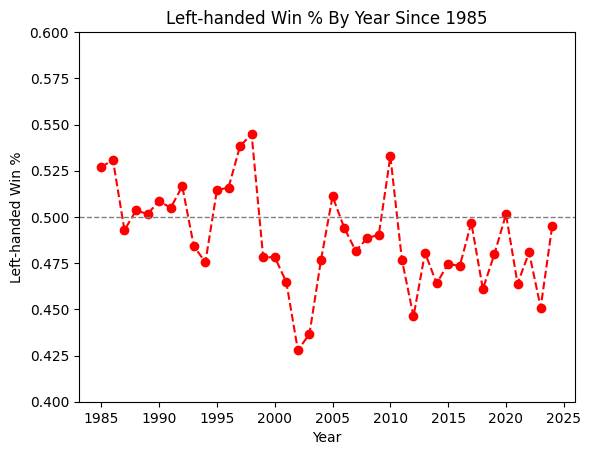

In [11]:
seasons = range(1985, 2025)
lefty_win_pct_by_year = [] # Left-handed player win percentage by year starting from 1985

for season in seasons:
    season_data = opposite_hand_matches[opposite_hand_matches['tourney_year'] == season]

    lefty_wins = 0
    righty_wins = 0
    for match in season_data.itertuples():
        if match.winner_hand == 'L':
            lefty_wins += 1
        else:
            righty_wins += 1
    
    lefty_win_pct_by_year.append(lefty_wins / (righty_wins + lefty_wins))

plt.plot(seasons, lefty_win_pct_by_year, 'ro--')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Left-handed Win %')
plt.title('Left-handed Win % By Year Since 1985')
plt.ylim(0.4, 0.6)

Interesting. The win percentage for left-handed players vs right-handed players actaully peaked before the 2000s, which is before Nadal turned Pro. I guess one player can only move the needle so much. Plus, Nadal was doing the heavy-lifting for the lefties while Djokovic and Federer were doing twice the amount of heavy lifting for the righties. It is also interesting that left-handed players had a higher win percentage than right-handed players in only 3/24 years from 2000-25  (12% of years), and they had a higher win percentage than right-handed players in 12/15 years from 1985-2000 (80% of years.)

Let us see what that plot would look like without Nadal. For that we must filter out any rows where Nadal was in the winner_name or loser_name.

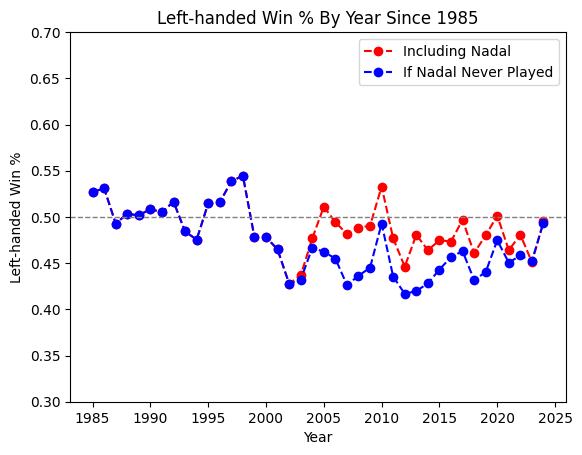

In [12]:
seasons = range(1985, 2025)
lefty_win_pct_by_year = []
lefty_win_pct_by_year_wo_nadal = [] # Left-handed player win percentage by year not including Nadal matches

for season in seasons:
    season_data = opposite_hand_matches[opposite_hand_matches['tourney_year'] == season]

    lefty_wins = 0
    righty_wins = 0
    lefty_wins_wo_nadal = 0
    righty_wins_wo_nadal = 0
    for match in season_data.itertuples():
        if match.winner_name != 'Rafael Nadal' and match.loser_name != 'Rafael Nadal': # Nadal did not play the match
            if match.winner_hand == 'L':
                lefty_wins += 1
                lefty_wins_wo_nadal += 1
            else:
                righty_wins += 1
                righty_wins_wo_nadal += 1
        else: # Nadal played the match
            if match.winner_hand == 'L':
                lefty_wins += 1
            else:
                righty_wins += 1
    
    lefty_win_pct_by_year.append(lefty_wins / (righty_wins + lefty_wins))
    lefty_win_pct_by_year_wo_nadal.append(lefty_wins_wo_nadal / (righty_wins_wo_nadal + lefty_wins_wo_nadal))

plt.plot(seasons, lefty_win_pct_by_year, 'ro--', label='Including Nadal')
plt.plot(seasons, lefty_win_pct_by_year_wo_nadal, 'bo--', label='If Nadal Never Played')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Left-handed Win %')
plt.title('Left-handed Win % By Year Since 1985')
plt.ylim(0.3, 0.7)
plt.legend()
plt.show()

Wow, he had a significantly positive effect on the win percentage for left-handed players, every year from 2004 up until 2023 when he got injured. Without Nadal, left-handed players would have had a lower win percentage than right-handed players every year since 1999 (25 years in a row and counting!).

### Which player has the highest game (not match) win percentage?

A game is not the same thing as a match. A game is 'the basic scoring unit, won by the first player or team to score at least four points with a two-point lead, using scores of Love (0), 15, 30, 40, and then Game.' Yes, it was even more confusing when my Cuban coach explained it to me in 2nd grade. Basically, when Djokovic is up 1-0, one game has been played. When Djkokovic is up 2-0, two games have been played, and so on.

In order to calculate which player has the highest game win percentage, we need to add up the total number of games won and total number of games lost for each player. We start by iterating through each match in the consolidated CSV, extracting games from the score column into a list (e.g., 6-2 6-4 becomes [6, 2, 6, 4]) and then assigning games won and games lost to both the winner and loser, taking advantage of the fact that games in even indeces of the list belong to the winner and odd indices belong to the loser.

In [13]:
import re 
from collections import defaultdict

player_stats = defaultdict(lambda: {'games_won': 0, 'games_lost': 0})

for match in all_data.itertuples(): 
    integers = list(map(int, re.findall(r'\d+', match.score))) # Converts 6-2 6-4 to [6,2,6,4]
    for i in range(len(integers)): 
        games = integers[i]
        if i % 2 == 0:
            player_stats[match.winner_name]['games_won'] += games
            player_stats[match.loser_name]['games_lost']  += games
            
        else:
            player_stats[match.loser_name]['games_won'] += games
            player_stats[match.winner_name]['games_lost']  += games

Now we are ready to calculate the actual percentages. At this point, it will be more efficient to turn our dictionary into a data frame, which is good for applying the same arithmetic using the same columns from all rows.

In [14]:
game_win_pct_by_player = pd.DataFrame.from_dict(player_stats, orient='index')
game_win_pct_by_player['pct'] = 100 * game_win_pct_by_player['games_won'] / (game_win_pct_by_player['games_won'] + game_win_pct_by_player['games_lost']) 

We can sort the rows in the dataframe according to the percentage of games each player won to get our answer. Note that you should filter the data frame and remove players who have not won more than 500 games because otherwise the leaderboard will be a bunch amateurs who played a few easy matches and have unrealistically high game win percentages.

In [15]:
filter = game_win_pct_by_player['games_won'] > 500
game_win_pct_by_player[filter]['pct'].sort_values(ascending=False).head(10)

Kent Carlsson     60.422101
Ivan Lendl        58.661439
Novak Djokovic    58.361484
Rafael Nadal      58.349664
John McEnroe      57.226582
Roger Federer     57.160766
Andre Agassi      56.747684
Stefan Edberg     56.475487
Miloslav Mecir    56.391993
Clement Ngoran    56.170213
Name: pct, dtype: float64

Wow! Who would have thought Kent Carlsson had the highest game win percentage. I never even heard of him before.

I just did some research on Kent and found out he won 35 sets on the score of 6/0 throughout his 5-year professional tennis career, so it makes sense that he leads in the '% of games won' category. And he played 94% of his matches on clay. What an interesting guy. Apparently now he trains horses back home in Sweden. The Nikola Jokic of Tennis.

The relative ranking of the GOATs makes sense to me. Djokovic with 24 grand slams standing at the No. 3 position, followed by Nadal with 20 grand slams at No. 4, and finally, Roger Federer at No. 6.